<a href="https://colab.research.google.com/github/sepbuda/Proyecto-Visi-n-por-Computador/blob/main/cifar10_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparación de Modelos de Deep Learning para la Clasificación de Imágenes en CIFAR-10**

# **INTRODUCCION**

**1.1 Descripción del Dataset**


El dataset CIFAR-10 contiene un total de 60,000 imágenes en color de 32x32 píxeles, organizadas en 10 categorías distintas, con 6,000 imágenes por cada clase. Este conjunto de datos está dividido en 50,000 imágenes para entrenamiento y 10,000 para pruebas. Las clases no se superponen entre sí, es decir, cada imagen pertenece a una única categoría. En este notebook, exploramos el uso de un Perceptrón Multicapa (MLP), una Red Neuronal Convolucional (CNN) y Aprendizaje Transferido mediante ResNet50 en TensorFlow, con el objetivo de crear un modelo que pueda identificar las imágenes del conjunto de prueba tras haber sido entrenado en el conjunto de entrenamiento de CIFAR-10.

**1.2 Detalles del Dataset**


* Total de Imágenes: 60,000 (50,000 para entrenamiento, 10,000 para prueba)
* Dimensiones de las Imágenes: 32x32 píxeles, imágenes a color (con 3 canales RGB)
* Número de Clases: 10 categorías diferentes
* Categorías:
  * Avión (Airplane)
  * Automóvil (Automobile)
  * Pájaro (Bird)
  * Gato (Cat)
  * Venado (Deer)
  * Perro (Dog)
  * Rana (Frog)
  * Caballo (Horse)
  * Barco (Ship)
  * Camión (Truck)


**1.3 Disponibilidad**

El dataset CIFAR-10 es un recurso muy popular en el ámbito de la investigación de machine learning y visión por computadora. Se puede acceder fácilmente a él a través de bibliotecas como TensorFlow y PyTorch, lo que lo convierte en una herramienta útil tanto para la enseñanza como para la investigación.

# **1. Librerías y Funciones Utilizadas**


**1. TensorFlow (tensorflow)**

Utilizado para construir y entrenar redes neuronales.

Dentro de TensorFlow, se emplean los siguientes componentes:

* **Adam**: Un optimizador eficiente que ajusta los pesos de la red neuronal durante el proceso de entrenamiento mediante el descenso del gradiente.

* **ImageDataGenerator**: Permite realizar aumentación de datos en tiempo real, es decir, genera variaciones de las imágenes de entrada (rotaciones, cambios de tamaño, etc.) para prevenir el sobreajuste y mejorar la capacidad de generalización del modelo.

* **ResNet50**: Una red neuronal convolucional preentrenada sobre el dataset de ImageNet. Se utiliza para Transfer Learning, lo que permite reutilizar los conocimientos aprendidos en grandes datasets para mejorar la precisión en nuevos conjuntos de datos.

* **to_categorical**: Convierte las etiquetas de clase en formato one-hot encoding, lo que es esencial para las redes neuronales multiclase. Por ejemplo, si la clase de una imagen es un "avión", esta función convierte la etiqueta en un vector binario de 10 posiciones, donde solo una de ellas será 1 y el resto 0.

**Capas Neuronales Usadas:**

* **Dense**: Capa totalmente conectada (fully connected) en redes neuronales.
* **GlobalAveragePooling2D:** Realiza el promedio de todas las activaciones de una capa convolucional antes de pasar a la capa densa.
* **BatchNormalization**: Normaliza la activación de las capas para acelerar el entrenamiento y mejorar la estabilidad.
* **Dropout**: Técnica para evitar el sobreajuste, donde se omiten (desactivan) aleatoriamente algunas neuronas durante el entrenamiento.
* **UpSampling2D:** Incrementa la resolución espacial de una imagen mediante la interpolación (aumenta el tamaño de la imagen).

**2. NumPy (numpy)**

Utilizado para realizar cálculos numéricos y manipular arrays.

**3. Matplotlib (matplotlib.pyplot)**

Herramienta de visualización en Python que permite crear gráficos.

**4. Scikit-learn (train_test_split)**

train_test_split es una función de Scikit-learn que divide el dataset en conjuntos de entrenamiento y validación. Esto es fundamental para evaluar el rendimiento del modelo durante el entrenamiento en un conjunto de datos no visto.

**5. Keras Callbacks**

* **ReduceLROnPlateau**: Callback que ajusta la tasa de aprendizaje cuando el modelo deja de mejorar. Si no se observan mejoras en la función de pérdida después de un número determinado de épocas, reduce la tasa de aprendizaje a la mitad.

* **EarlyStopping**: Callback que detiene el entrenamiento si no se observan mejoras en la función de pérdida después de varias épocas consecutivas. Ayuda a evitar entrenamientos largos y sobreajuste innecesario.

**6. Manejo de Advertencias (warnings)**

warnings.filterwarnings('ignore') es una función utilizada para ignorar advertencias en la ejecución del código, asegurando que no interfieran con la visualización de resultados ni interrumpan la ejecución.

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, UpSampling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

import warnings

warnings.filterwarnings('ignore')

# **2. Carga y Exploración del Dataset CIFAR-10**

## **2.1 Cargar el Dataset CIFAR-10**

Se está utilizando el dataset CIFAR-10, uno de los conjuntos de datos más ampliamente usados en investigación y desarrollo en el área de Machine Learning y Visión por Computadora.

El conjunto de datos CIFAR-10 proviene directamente de la biblioteca TensorFlow, lo que permite acceder fácilmente a este recurso sin necesidad de descargarlo manualmente. TensorFlow ofrece una función específica, tf.keras.datasets.cifar10.load_data(), que simplifica la carga y manejo de los datos. Esta función devuelve dos tuplas:

* **x_train, y_train:** El conjunto de datos de entrenamiento, que incluye imágenes y etiquetas.

  * x_train contiene las imágenes del conjunto de entrenamiento (50,000 imágenes en total).
  * y_train contiene las etiquetas correspondientes a esas imágenes, indicando a qué clase pertenece cada imagen.

* **x_test, y_test:** El conjunto de datos de prueba, también compuesto por imágenes y etiquetas.

  * x_test incluye 10,000 imágenes del conjunto de prueba.
  * y_test tiene las etiquetas correspondientes, utilizadas para evaluar el modelo una vez entrenado.

In [7]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## **2.2 Clases en CIFAR-10**

CIFAR-10 consta de 10 clases diferentes de objetos. Cada imagen está etiquetada con una clase correspondiente a un objeto particular, como se define en la lista class_names. Estas categorías son mutuamente exclusivas, es decir, cada imagen solo pertenece a una de estas clases:

* Airplane (Avión)
* Automobile (Automóvil)
* Bird (Pájaro)
* Cat (Gato)
* Deer (Venado)
* Dog (Perro)
* Frog (Rana)
* Horse (Caballo)
* Ship (Barco)
* Truck (Camión)

Estas clases cubren una variedad de objetos comunes y animales.

In [8]:
# Clases en CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Análisis de la distribución de clases en los datos de entrenamiento y prueba
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

## **2.3 Gráfico de Barras para el Conjunto de Entrenamiento y el conjunto de Prueba**

A continuación se representa la distribución de clases en los conjuntos de entrenamiento y prueba de CIFAR-10. Los gráficos permiten observar cuántas imágenes hay de cada clase, facilitando la comprensión de la estructura del dataset y asegurando que no haya desequilibrios significativos en la cantidad de imágenes por clase.

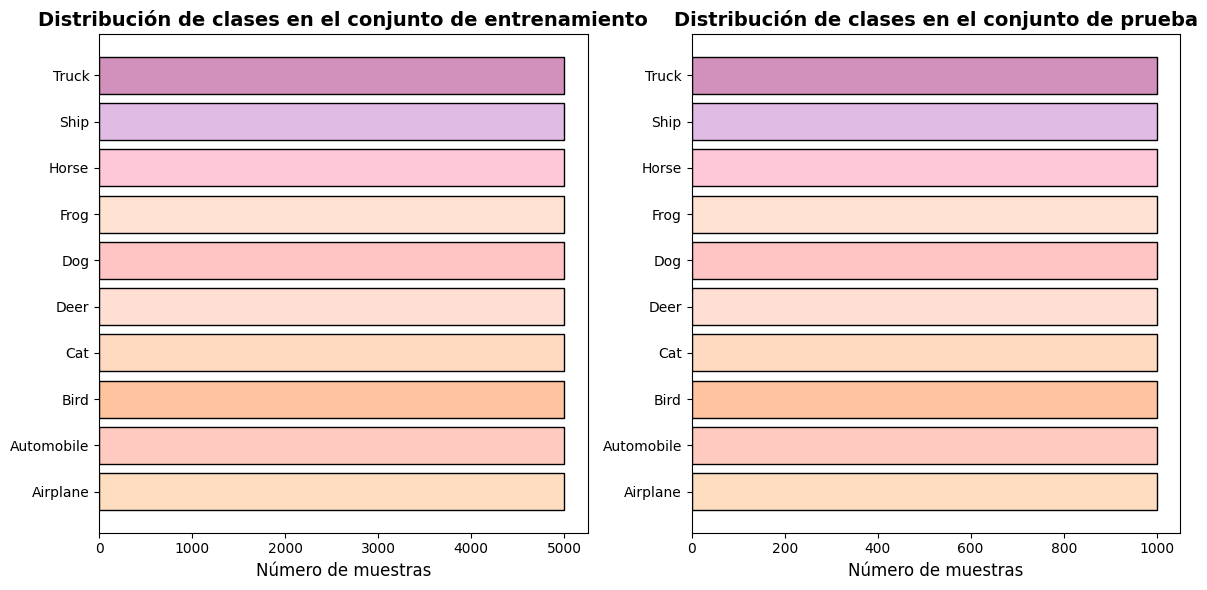

In [9]:
# Colores en tonos pasteles
colors_pastel = ['#FFDDC1', '#FFCBC1', '#FFC3A0', '#FFDAC1', '#FFDFD3',
                 '#FFC4C4', '#FFE2D1', '#FEC8D8', '#E0BBE4', '#D291BC']  # Paleta pastel clara

# Crear figura
plt.figure(figsize=(12, 6))

# Gráfico de distribución para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.barh(class_names, train_counts, color=colors_pastel, edgecolor='black')
plt.xlabel('Número de muestras', fontsize=12)
plt.title('Distribución de clases en el conjunto de entrenamiento', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gráfico de distribución para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.barh(class_names, test_counts, color=colors_pastel, edgecolor='black')
plt.xlabel('Número de muestras', fontsize=12)
plt.title('Distribución de clases en el conjunto de prueba', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# **3. Preprocesamiento de los Datos**

Antes de entrenar el modelo de red neuronal, se preprocesan los datos. El preprocesamiento es una etapa crucial, ya que garantiza que los datos se preparen en el formato adecuado para que el modelo pueda procesarlos y aprender de ellos de manera eficiente.

## **3.1 Normalización de los Valores de los Píxeles**

los valores de los píxeles de las imágenes se normalizan para que estén dentro del rango de [0, 1]. Originalmente, los valores de los píxeles en las imágenes de CIFAR-10 varían entre 0 y 255, ya que representan intensidades de color en 8 bits por canal de color.

In [10]:
# Normalización: Escalamos los valores de píxeles a [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## **3.2 División del Conjunto de Entrenamiento en Entrenamiento y Validación**

Se divide el conjunto de entrenamiento en dos subconjuntos:

* Datos de Entrenamiento (x_train, y_train): El 90% de los datos se usarán para entrenar el modelo y ajustar los pesos de la red neuronal.

* Datos de Validación (x_val, y_val): El 10% de los datos se reservará para validación. Estos datos no se utilizan para entrenar el modelo, pero sirven para verificar su rendimiento en datos que no ha visto durante el entrenamiento.


In [11]:
# Dividimos los datos de entrenamiento en entrenamiento y validación (90% entrenamiento, 10% validación)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Convertir las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# **4. Modelos**

## **4.1 MLP (Perceptrón Multicapa)**

En esta sección, construimos y entrenamos un Perceptrón Multicapa (MLP) para clasificar imágenes del conjunto de datos CIFAR-10. A diferencia de las Redes Neuronales Convolucionales (CNN), los MLP no capturan las relaciones espaciales de las imágenes, por lo que las imágenes deben ser aplanadas antes de ser procesadas por las capas densas del modelo.

### **4.1.1 Arquitectura del Modelo MLP**

Este código define un Perceptrón Multicapa (MLP) que consiste en una serie de capas densas. Las imágenes deben ser aplanadas para que el modelo MLP pueda procesarlas correctamente.

Cuando trabajamos con un MLP, es necesario convertir las imágenes de una estructura bidimensional o tridimensional (en el caso de imágenes con canales de color) a una estructura unidimensional (un vector). Aplanar una imagen consiste en convertir su matriz tridimensional en un vector unidimensional.

Por ejemplo, en CIFAR-10, cada imagen tiene la forma 32x32x3, lo que significa:

32 filas
32 columnas
3 canales de color (rojo, verde y azul o RGB)
Al multiplicar estas dimensiones obtenemos un total de 3072 píxeles por imagen, por lo que cada imagen aplanada será un vector de 3072 elementos.

In [12]:
def create_mlp_model():
    model = tf.keras.models.Sequential(name="MLP_model")  # Modelo Secuencial

    # Aplanar las imágenes de entrada de 32x32x3 a un vector unidimensional de 3072
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    # Primera capa densa con 512 neuronas
    model.add(tf.keras.layers.Dense(512, activation='relu'))

    # Segunda capa densa con 256 neuronas
    model.add(tf.keras.layers.Dense(256, activation='relu'))

    # Tercera capa densa con 128 neuronas
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    # Capa de salida con 10 neuronas para las 10 clases del CIFAR-10
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

**EXPLICACIÓN DEL MODELO MLP:**

* **Aplanamiento de las Imágenes:** La primera capa aplana la imagen de 32x32x3 a un vector de 3072 elementos para que el MLP pueda procesarla.

* **Capas Densas:** El modelo contiene tres capas densas totalmente conectadas con 512, 256 y 128 neuronas, respectivamente. Estas capas utilizan la función de activación ReLU para aprender relaciones no lineales en los datos.

* **Capa de salida:** La capa final tiene 10 neuronas (una para cada clase del dataset) y utiliza la función de activación softmax para generar probabilidades que suman 1, lo que facilita la predicción de la clase correcta.

### **4.1.2 Entrenamiento del Modelo MLP en los datos de Entrenamiento**

A continuación, entrenaremos el modelo MLP usando el optimizador Adam y la función de pérdida categorical_crossentropy, adecuada para problemas de clasificación multiclase.

In [13]:
# Crear y compilar el modelo MLP
mlp_model = create_mlp_model()
mlp_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
mlp_model.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

**DETALLES DEL ENTRENAMIENTO**

* **Optimizador**: Adam es un optimizador eficiente que ajusta los pesos del modelo mediante la combinación de las ventajas de RMSProp y SGD.
* **Función de pérdida**: categorical_crossentropy mide el error entre las predicciones del modelo y las etiquetas reales.
* **Batch Size y Epochs**: el modelo procesará 128 imágenes a la vez, y entrenaremos el modelo durante 20 épocas.

In [14]:
# Entrenar el modelo MLP
history_mlp = mlp_model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=128,
                            validation_data=(x_val, y_val)) # Use 10% of training data as validation

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2489 - loss: 2.0878 - val_accuracy: 0.3628 - val_loss: 1.7653
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3786 - loss: 1.7225 - val_accuracy: 0.3948 - val_loss: 1.6737
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4200 - loss: 1.6227 - val_accuracy: 0.4226 - val_loss: 1.5983
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4397 - loss: 1.5653 - val_accuracy: 0.4160 - val_loss: 1.5808
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4630 - loss: 1.5085 - val_accuracy: 0.4374 - val_loss: 1.5591
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4725 - loss: 1.4704 - val_accuracy: 0.4190 - val_loss: 1.5915
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4846 - loss: 1.4385 - val_accuracy: 0.4560 - val_loss: 1.5224
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5012 - loss: 1.4002 - val_accuracy: 0.

### **4.1.3 Evaluación del Modelo MLP en los datos de Prueba**

Una vez completado el entrenamiento del modelo MLP, evaluamos su rendimiento en el conjunto de prueba. En esta sección, se muestran los resultados de las métricas de pérdida (loss) y precisión (accuracy) obtenidas durante la evaluación.

In [15]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = mlp_model.evaluate(x_test, y_test)
print(f"MLP Test Loss: {test_loss}")
print(f"MLP Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5111 - loss: 1.4213
MLP Test Loss: 1.4135582447052002
MLP Test Accuracy: 0.5076000094413757


**RESULTADOS DE LA EVALUACIÓN DEL MODELO MLP:**
* **MLP Test Loss (Pérdida en el conjunto de prueba):** 1.4768918752670288
* **MLP Test Accuracy (Precisión en el conjunto de prueba):** 0.49880000948905945 (49.88%)

**ANÁLISIS DE RESULTADOS:**

* **Precisión (accuracy):** El modelo ha alcanzado una precisión del 49.8850.45% en el conjunto de prueba, lo que significa que el MLP puede clasificar correctamente aproximadamente la mitad de las imágenes no vistas durante el entrenamiento. Aunque se ha superado el umbral del 50%, este valor indica que aún hay margen para mejorar el rendimiento del modelo.

* **Pérdida (loss):** La pérdida del modelo en el conjunto de prueba es 1.43, lo que sugiere que el modelo todavía comete errores en la clasificación. Un valor de pérdida más bajo indica un mejor rendimiento, por lo que este valor refleja que el modelo no ha alcanzado una optimización total.

**Métricas de Evaluación:**
* **Accuracy**: Mide la precisión del modelo, es decir, el porcentaje de predicciones correctas.
* **Loss**: Representa el error que el modelo está cometiendo durante la predicción de las clases.
* **val_accuracy y val_loss**: Durante el entrenamiento, estas métricas fueron observadas para medir la capacidad del modelo de generalizar a datos no vistos.


### **4.1.4 Visualización de Resultados (Precisión y Pérdida)**

En los gráficos presentados, se muestra la evolución de la precisión (accuracy) y la pérdida (loss) tanto en el conjunto de entrenamiento como en el de validación a lo largo de las 20 épocas.


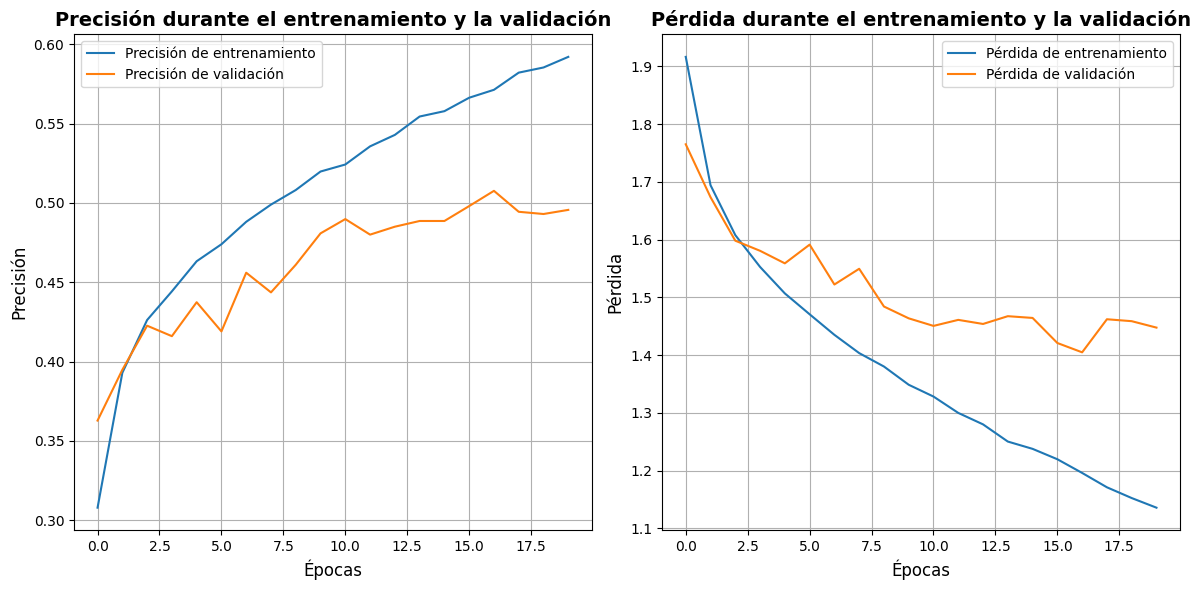

In [16]:
# Graficar la precisión (accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_mlp.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True)

# Graficar la pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True)

# Ajustar diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

**RESULTADOS DEL ENTRENAMIENTO DEL MODELO MLP:**

* **Análisis del gráfico de Precisión:**
  * **Curva de Precisión de Entrenamiento:** La precisión del modelo en el conjunto de entrenamiento muestra una tendencia ascendente continua, alcanzando aproximadamente un 60% al final de las épocas. Esto indica que el modelo está aprendiendo correctamente los patrones de los datos de entrenamiento.

  * **Curva de Precisión de Validación:** La precisión en el conjunto de validación también mejora en las primeras épocas, alcanzando cerca del 50%. Sin embargo, esta curva se estabiliza antes que la del conjunto de entrenamiento, lo que sugiere que el modelo tiene dificultades para generalizar con datos no vistos.

* **Análisis del gráfico de Pérdida:**
  * Curva de Pérdida de Entrenamiento: La pérdida en el conjunto de entrenamiento disminuye de manera constante durante el entrenamiento, lo que es una señal de que el modelo está optimizando sus parámetros y cometiendo menos errores.

  * Curva de Pérdida de Validación: La pérdida en el conjunto de validación también disminuye en las primeras épocas, pero después de un punto comienza a estabilizarse, indicando que el modelo está llegando a un punto de saturación en su capacidad de generalización.

**INTERPRETACIÓN:**

* **Discrepancia entre Entrenamiento y Validación:** Se observa una divergencia entre las curvas de entrenamiento y validación hacia el final del entrenamiento. Esta discrepancia puede ser indicativa de un ligero sobreajuste del modelo, lo que significa que el MLP está aprendiendo demasiado bien los patrones del conjunto de entrenamiento, pero no puede generalizar de manera efectiva a los datos de validación.

* **Posible mejoría:** El comportamiento de las curvas sugiere que el modelo podría beneficiarse de técnicas adicionales para mejorar la generalización, como la regularización o el aumento de datos (data augmentation).


### **4.1.5 Evaluación del Modelo MLP con Matriz de Confusión**

Agregamos la matriz de confusión para visualizar el rendimiento del modelo sobre el conjunto de prueba y analizar en detalle las predicciones correctas e incorrectas de cada clase.

In [17]:
# Realizar predicciones en el conjunto de prueba
y_pred = np.argmax(mlp_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Definir un colormap en tonos pastel rosas

# Crear un gradiente de color en tonos rosas
pastel_pink_cmap = LinearSegmentedColormap.from_list("pastel_pink", ['#f9e1e0', '#f4978e', '#f08080', '#e57373'])

# Mostrar la matriz de confusión con personalización
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Ajustar tamaño de la figura
disp.plot(ax=ax, cmap=pastel_pink_cmap, xticks_rotation='vertical', values_format='d')

# Personalización de la visualización
plt.title("Matriz de Confusión del Modelo MLP en CIFAR-10", fontsize=18, fontweight='bold', color='#333')
plt.xticks(fontsize=10, color='#333')
plt.yticks(fontsize=10, color='#333')
plt.ylabel('Etiqueta Verdadera', fontsize=10, color='#333')
plt.xlabel('Etiqueta Predicha', fontsize=10, color='#333')

# Ajustar los márgenes y mostrar
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


NameError: name 'LinearSegmentedColormap' is not defined

**Principales observaciones para el modelo MLP:**

* **Aciertos y Confusión:** El modelo presenta buenos resultados en clases como "Airplane" y "Ship", pero tiene problemas para clasificar correctamente imágenes de clases como "Dog", "Cat", y "Truck".


### **4.1.6 Conclusiones del Modelo MLP**

El modelo MLP entrenado para clasificar imágenes del conjunto de datos CIFAR-10 ha demostrado un rendimiento razonable, alcanzando una precisión de 50.45% en el conjunto de prueba. A continuación, se resumen las principales conclusiones basadas en los resultados obtenidos:

  * **1. Capacidad de Aprendizaje del MLP:** El MLP ha logrado aprender patrones significativos en los datos de entrenamiento, como lo demuestra la curva de precisión en el conjunto de entrenamiento, que alcanza aproximadamente un 60% al final de las 20 épocas. Esto indica que el modelo ha sido capaz de optimizar sus parámetros de manera adecuada durante el entrenamiento.

  * **2. Generalización Moderada:** A pesar de que la precisión en el conjunto de validación alcanza el 50%, existe una discrepancia evidente entre las curvas de entrenamiento y validación, especialmente en las últimas épocas. Esta divergencia sugiere que el modelo está empezando a sobreajustarse a los datos de entrenamiento, lo que afecta su capacidad para generalizar a datos no vistos.

  * **3. Pérdida Estabilizada:** Tanto la pérdida en el conjunto de entrenamiento como en el de validación han disminuido de manera constante en las primeras épocas. Sin embargo, la curva de pérdida de validación se estabiliza, lo que indica que el modelo ha alcanzado un punto de saturación en su capacidad de mejorar el rendimiento en datos no entrenados. Esto es indicativo de que el modelo podría estar limitado por su arquitectura.

  * **4. Problemas en Clases Complejas:** La matriz de confusión muestra que el modelo tiene dificultades para clasificar correctamente imágenes en clases como "Dog", "Cat", y "Truck", lo que sugiere que el modelo no está capturando bien las características distintivas de estas clases. Esto es coherente con las limitaciones de los MLP, que no son adecuados para capturar las relaciones espaciales complejas que se presentan en problemas de clasificación de imágenes.

  * **5. Limitaciones del MLP:** Aunque el MLP ha logrado una precisión aceptable, las limitaciones inherentes a esta arquitectura (como la incapacidad para reconocer patrones espaciales) sugieren que un modelo más avanzado, como una Red Neuronal Convolucional (CNN), sería más adecuado para este tipo de tareas. Las CNN están diseñadas específicamente para capturar relaciones espaciales, lo que les permite reconocer características visuales clave en imágenes.

  * **6. Oportunidades de Mejora:**
* **Cambio de Arquitectura:** Una mejora significativa en la precisión y la capacidad de generalización podría lograrse al cambiar a una CNN, que es mucho más adecuada para la clasificación de imágenes.
* **Regularización y Aumento de Datos:** Para reducir el sobreajuste, se podrían aplicar técnicas de regularización o aumentación de datos (data augmentation), lo que ayudaría a mejorar la generalización del modelo.
* **Ajuste de Hiperparámetros:** Modificar algunos parámetros como la tasa de aprendizaje, el tamaño del lote o el número de neuronas en cada capa podría ayudar a mejorar el rendimiento del modelo.

* **7. Conclusión Final:**
En resumen, el MLP ha demostrado ser una solución funcional pero **limitada** para la clasificación de imágenes en CIFAR-10. Aunque ha alcanzado un rendimiento razonable con una precisión superior al 50%, un **modelo más adecuado **para tareas de visión por computadora, como una CNN, ofrecería un rendimiento mucho más robusto y eficiente. Este trabajo sirve como un punto de partida para explorar arquitecturas más avanzadas en problemas de clasificación de imágenes.








## **4.2 CNN (Convolutional Neural Network)**

En esta sección, construiremos y entrenaremos una Red Neuronal Convolucional (CNN) para clasificar imágenes del conjunto de datos CIFAR-10. A diferencia de un MLP, las CNN tienen la capacidad de capturar relaciones espaciales en las imágenes, lo que las hace mucho más efectivas para tareas de clasificación de imágenes.

### **4.2.1 Arquitectura del Modelo CNN**

El modelo CNN está compuesto por capas convolucionales seguidas de capas de pooling (agrupamiento), que permiten reducir la dimensionalidad de las imágenes manteniendo la información más relevante.

In [18]:
def create_cnn_model():
    model = tf.keras.models.Sequential(name="CNN_model")

    # Primera capa convolucional y pooling
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Segunda capa convolucional y pooling
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Tercera capa convolucional y pooling
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Aplanar las capas convolucionales
    model.add(tf.keras.layers.Flatten())

    # Capa densa
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    # Capa de salida para 10 clases
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

**EXPLICACIÓN DEL MODELO CNN:**

* **Capas Convolucionales**: Cada capa convolucional aplica filtros para extraer características de las imágenes, como bordes, texturas y patrones más complejos.
* **Capas de Pooling**: Después de cada capa convolucional, se aplica MaxPooling, que reduce la dimensionalidad de las características y hace que el modelo sea más eficiente.
* **Capa Densa Final**: Se utilizan capas densas para realizar la clasificación final en 10 categorías, utilizando la función de activación softmax. Después de aplanar la salida de las capas convolucionales, se añaden una capa densa con 128 neuronas y una capa final con 10 neuronas (una por clase de CIFAR-10).


### **4.2.3 Entrenamiento del Modelo CNN**

A continuación, entrenaremos el modelo CNN usando el optimizador Adam y la función de pérdida categorical_crossentropy, que es adecuada para problemas de clasificación multiclase. Además, evaluaremos el rendimiento del modelo en el conjunto de prueba.

In [19]:
# Crear y compilar el modelo CNN
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn = cnn_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3089 - loss: 1.8681 - val_accuracy: 0.5066 - val_loss: 1.3822
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5144 - loss: 1.3547 - val_accuracy: 0.5798 - val_loss: 1.1908
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5879 - loss: 1.1683 - val_accuracy: 0.6052 - val_loss: 1.1129
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6301 - loss: 1.0555 - val_accuracy: 0.6436 - val_loss: 1.0096
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6613 - loss: 0.9654 - val_accuracy: 0.6518 - val_loss: 0.9965
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6908 - loss: 0.8900 - val_accuracy: 0.6698 - val_loss: 0.9444
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7126 - loss: 0.8288 - val_accuracy: 0.6870 - val_loss: 0.9075
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7292 - loss: 0.7799 - val_accuracy: 0

**DETALLES DEL ENTRENAMIENTO:**

* **Optimizador:** Adam es un optimizador popular que combina las ventajas de otros métodos como RMSProp y SGD, lo que permite un ajuste eficiente de los pesos del modelo.
* **Función de pérdida:** categorical_crossentropy mide el error entre las predicciones del modelo y las etiquetas reales, buscando minimizar esta diferencia.
* **Batch Size y Epochs:** El tamaño de los lotes es 128, lo que significa que el modelo ajustará sus pesos después de procesar 128 imágenes, y se entrenará durante 20 épocas.

### **4.2.4 Evaluación del Modelo CNN**

Una vez completado el entrenamiento, evaluamos el modelo CNN en el conjunto de prueba, mostrando las métricas de precisión (accuracy) y pérdida (loss).

In [20]:
# Evaluar en el conjunto de prueba
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Loss: {test_loss}")
print(f"CNN Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7129 - loss: 0.9952
CNN Test Loss: 1.0102227926254272
CNN Test Accuracy: 0.710099995136261


**RESULTADOS DE LA EVALUACIÓN DEL MODELO CNN:**

* **CNN Test Loss (Pérdida en el conjunto de prueba):** 1.018559217453003
* **CNN Test Accuracy (Precisión en el conjunto de prueba):** 0.7128000259399414 (71.28%)

**ANÁLISIS DE RESULTADOS:**

* **Precisión (accuracy):** El modelo ha alcanzado una precisión del 71.28% en el conjunto de prueba, lo que significa que el modelo CNN puede clasificar correctamente aproximadamente el 71% de las imágenes no vistas durante el entrenamiento. Este valor muestra un rendimiento sólido y notablemente mejor que el de un MLP típico, gracias a la capacidad de la CNN para capturar las relaciones espaciales de las imágenes.

* **Pérdida (loss):** La pérdida del modelo en el conjunto de prueba es 1.05, lo que indica que el modelo sigue cometiendo algunos errores en la clasificación. Sin embargo, este valor es significativamente menor que en arquitecturas más simples como el MLP, lo que sugiere que el modelo ha aprendido de manera eficiente durante el entrenamiento, aunque aún podría mejorarse.

### **4.2.5 Visualización de Resultados (Precisión y Pérdida)**
Para entender mejor el desempeño del modelo CNN, graficamos la evolución de la precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación a lo largo de las épocas.

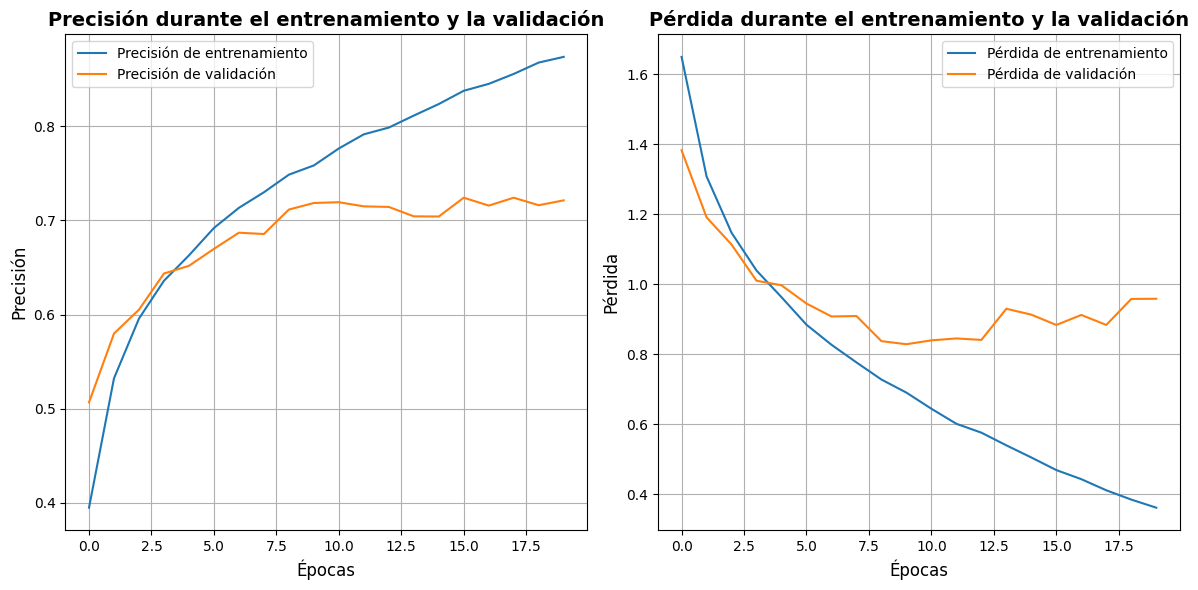

In [21]:
# Graficar la precisión (accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True)

# Graficar la pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True)

# Ajustar diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

**RESULTADOS DEL ENTRENAMIENTO DEL MODELO CNN:**

* **Análisis del gráfico de Precisión:**

  * **Curva de Precisión de Entrenamiento:** La precisión del modelo CNN en el conjunto de entrenamiento muestra una tendencia ascendente constante, alcanzando alrededor del 80% hacia las últimas épocas. Esto indica que el modelo está aprendiendo de manera eficiente los patrones en los datos de entrenamiento, mejorando progresivamente con cada época.

  * **Curva de Precisión de Validación:** La precisión en el conjunto de validación también aumenta al principio, estabilizándose alrededor del 70%. A diferencia de la curva de entrenamiento, esta se vuelve más irregular, sugiriendo que el modelo podría estar experimentando dificultades para generalizar los datos no vistos de manera consistente a lo largo del entrenamiento.

* **Análisis del gráfico de Pérdida:**

  * **Curva de Pérdida de Entrenamiento:** La pérdida en el conjunto de entrenamiento disminuye de manera sostenida, lo que indica una buena optimización del modelo a medida que ajusta sus pesos. La pérdida final está cerca de 0.4, lo que refleja que el modelo comete relativamente pocos errores en el conjunto de entrenamiento.

  * **Curva de Pérdida de Validación:** La pérdida en el conjunto de validación también disminuye al principio, pero luego comienza a estabilizarse y se mantiene alrededor de 1.2, con algunas oscilaciones. Esto sugiere que el modelo tiene dificultades para mejorar más allá de cierto punto en su capacidad de generalización, lo que podría ser un indicio de sobreajuste.

**INTERPRETACIÓN:**

* **Discrepancia entre Entrenamiento y Validación:** Al igual que con la precisión, se observa una discrepancia entre las curvas de entrenamiento y validación en la pérdida. El hecho de que la pérdida en validación se estabilice en un valor más alto que la pérdida en entrenamiento sugiere que el modelo CNN está empezando a sobreajustarse a los datos de entrenamiento, lo que podría limitar su capacidad de generalización.

* **Posible mejora:** El comportamiento de las curvas sugiere que el modelo CNN podría beneficiarse de técnicas de regularización adicionales o de un aumento en la complejidad de los datos de entrada (aumentación de datos) para mejorar la precisión en la validación y reducir la pérdida.

### **4.2.6 Evaluación del Modelo CNN con Matriz de Confusión**

Podemos generar la matriz de confusión para obtener una visión más detallada del rendimiento del modelo en cada clase del conjunto de prueba.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


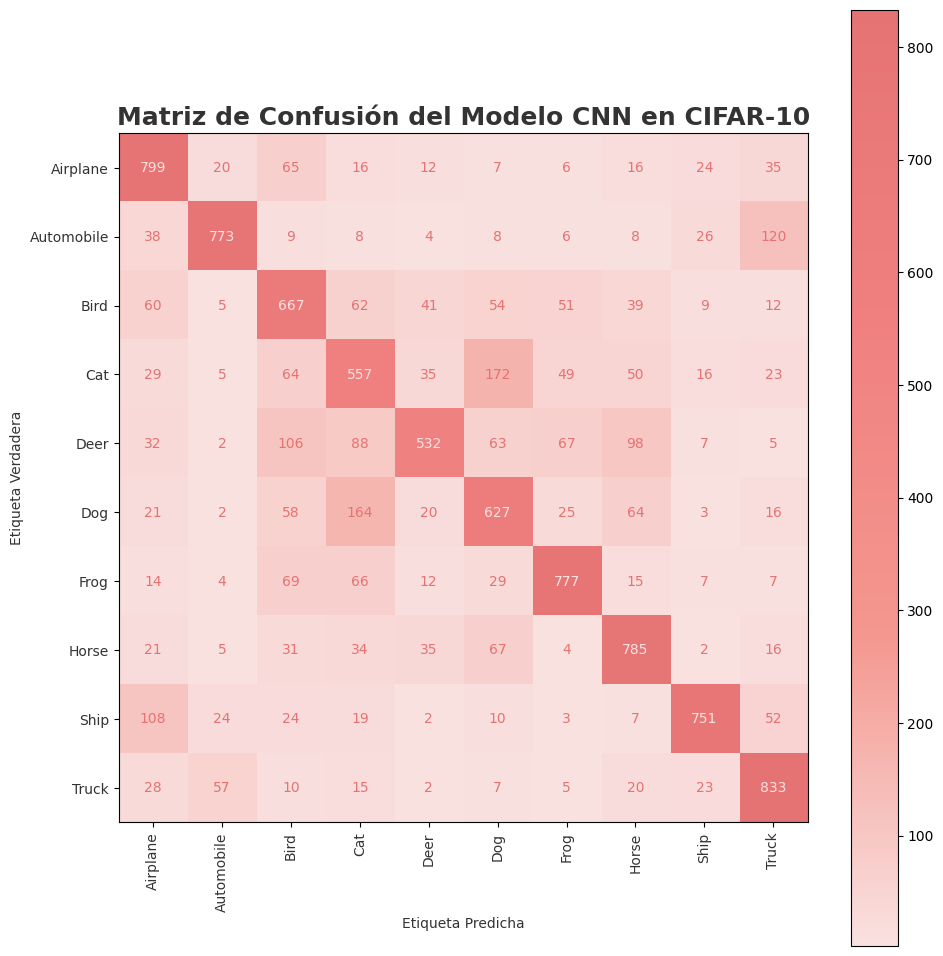

In [25]:
# Realizar predicciones en el conjunto de prueba
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Crear un gradiente de color en tonos pastel rosas
pastel_pink_cmap = LinearSegmentedColormap.from_list("pastel_pink", ['#f9e1e0', '#f4978e', '#f08080', '#e57373'])

# Mostrar la matriz de confusión con personalización
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Ajustar tamaño de la figura
disp.plot(ax=ax, cmap=pastel_pink_cmap, xticks_rotation='vertical', values_format='d')

# Personalización de la visualización
plt.title("Matriz de Confusión del Modelo CNN en CIFAR-10", fontsize=18, fontweight='bold', color='#333')
plt.xticks(fontsize=10, color='#333')
plt.yticks(fontsize=10, color='#333')
plt.ylabel('Etiqueta Verdadera', fontsize=10, color='#333')
plt.xlabel('Etiqueta Predicha', fontsize=10, color='#333')

# Ajustar los márgenes y mostrar
plt.tight_layout()
plt.show()


**Principales observaciones para el modelo CNN:**

* **Aciertos y confusión:** El modelo CNN presenta buenos resultados en las clases "Airplane", "Automobile", "Ship" y "Truck", lo que indica que es eficiente para clasificar imágenes con formas más distintivas. Sin embargo, se observa mayor confusión en las clases de animales, especialmente entre "Cat", "Dog", y "Frog", lo que sugiere que el modelo tiene dificultades para diferenciar imágenes con características más sutiles o similares.

### **4.2.7 Conclusiones del Modelo CNN**

## **4.3. ResNet50**

### 4.3.1 Preprocesamiento y Augmentación

Al igual que en los modelos anteriores, cargamos el conjunto de datos CIFAR-10 y aplicamos el preprocesamiento necesario para utilizar ResNet50. Esto incluye la normalización de las imágenes y la preparación de las etiquetas en formato one-hot encoding.

In [26]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocesamiento de las imágenes usando las herramientas de ResNet50
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Aplicar la función de preprocesamiento de ResNet50
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

# Dividir los datos en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# One-hot encode de las etiquetas
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Definir ImageDataGenerator para Augmentación de datos
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

### **4.3.2 Arquitectura del Modelo ResNet50**

En esta sección, definimos el modelo ResNet50 utilizando pesos preentrenados en ImageNet. Las imágenes de CIFAR-10 son redimensionadas de 32x32 a 224x224, como requiere ResNet50. Utilizamos capas adicionales para clasificar las imágenes en las 10 clases de CIFAR-10.

In [27]:
def create_resnet_model():
    # Crear la entrada para el modelo con las dimensiones correctas
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    # Redimensionar las imágenes de entrada de 32x32 a 224x224
    resized_inputs = UpSampling2D(size=(7, 7))(inputs)

    # Cargar ResNet50 con pesos preentrenados en ImageNet
    resnet_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_tensor=resized_inputs
    )

    # Congelar todas las capas de ResNet50
    for layer in resnet_model.layers:
        layer.trainable = False

    # Descongelar las últimas 30 capas
    NUM_LAYERS_TO_UNFREEZE = 30
    for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
        layer.trainable = True

    # Añadir las capas superiores de clasificación
    x = GlobalAveragePooling2D()(resnet_model.output)
    x = Dense(1024, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    classification_output = Dense(10, activation="softmax", name="classification")(x)

    # Conectar la extracción de características y las capas de clasificación
    model = Model(inputs=inputs, outputs=classification_output, name="ResNet")

    # Compilar el modelo
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

ResNet_model = create_resnet_model()
ResNet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "ResNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ up_sampling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)             

 Total params: 26,351,754 (100.52 MB)

 Trainable params: 17,210,634 (65.65 MB)

 Non-trainable params: 9,141,120 (34.87 MB)

**EXPLICACIÓN DEL MODELO RESNET50:**

* **Capas Convolucionales:** ResNet50 utiliza capas convolucionales preentrenadas, lo que permite la extracción de características avanzadas.
* **Capas de Pooling**: A medida que se procesan las imágenes, se reduce la dimensionalidad de las características con el uso de capas de MaxPooling.
* **Capas Densas**: Las capas completamente conectadas añaden flexibilidad y capacidad de clasificación a las características extraídas.
Función de activación Softmax: Utilizada en la capa de salida para clasificar en una de las 10 clases de CIFAR-10.

### **4.3.3 Entrenamiento del Modelo ResNet50**

Entrenamos el modelo ResNet50 con el conjunto de entrenamiento utilizando augmentación de datos y callbacks como EarlyStopping y ReduceLROnPlateau para ajustar el aprendizaje. Esto asegura que el modelo no se sobreajuste y optimice el rendimiento en los datos de validación.

In [28]:
# Callbacks para ajustar el entrenamiento
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Definir batch size y número de épocas
batch_size = 64
epochs = 20

# Entrenar el modelo ResNet50 con augmentación de datos
history = ResNet_model.fit(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
    callbacks=[reduce_lr, early_stopping],
    shuffle=True
)

Epoch 1/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 198s 242ms/step - accuracy: 0.6726 - loss: 1.0076 - val_accuracy: 0.7930 - val_loss: 0.6047 - learning_rate: 0.0010
Epoch 2/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7812 - loss: 0.6478 - val_accuracy: 0.7886 - val_loss: 0.5998 - learning_rate: 0.0010
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 156s 222ms/step - accuracy: 0.8319 - loss: 0.5016 - val_accuracy: 0.8516 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 4/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8594 - loss: 0.5733 - val_accuracy: 0.8526 - val_loss: 0.4342 - learning_rate: 0.0010
Epoch 5/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 156s 222ms/step - accuracy: 0.8679 - loss: 0.3894 - val_accuracy: 0.8656 - val_loss: 0.4046 - learning_rate: 0.0010
Epoch 6/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7656 - loss: 0.6658 - val_accuracy: 0.8648 - val_loss: 0.4134 - learning_rate: 0.0010
Epoch 7/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 156s 222ms/step - accuracy: 0.

**DETALLES DEL ENTRENAMIENTO:**

* **Callbacks**: Se utilizan ReduceLROnPlateau para reducir la tasa de aprendizaje cuando la pérdida no mejora, y EarlyStopping para detener el entrenamiento si no hay mejoras en 5 épocas.
* **Batch Size y Epochs:** El tamaño del lote es 64, y el modelo se entrena durante un máximo de 20 épocas, ajustando los pesos después de procesar cada lote.
* **Augmentación de Datos**: Se aplica augmentación durante el entrenamiento para mejorar la capacidad de generalización del modelo.
* **Optimizador**: Adam, conocido por su eficiencia en la actualización de los pesos.

### **4.3.4 Evaluación del Modelo ResNet50**

Al final del entrenamiento, evaluamos el modelo en el conjunto de prueba para obtener métricas como la precisión y la pérdida.

In [29]:
# Evaluar el modelo ResNet50 en el conjunto de prueba
test_loss, test_accuracy = ResNet_model.evaluate(test_generator.flow(x_test, y_test, batch_size=batch_size))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.9134 - loss: 0.2803
Test Loss: 0.26512423157691956
Test Accuracy: 0.9182999730110168


### **4.3.5 Visualización de Resultados (Precisión y Pérdida)**
Para visualizar el rendimiento del modelo, graficamos la evolución de la precisión y la pérdida en el conjunto de entrenamiento y validación a lo largo de las épocas.



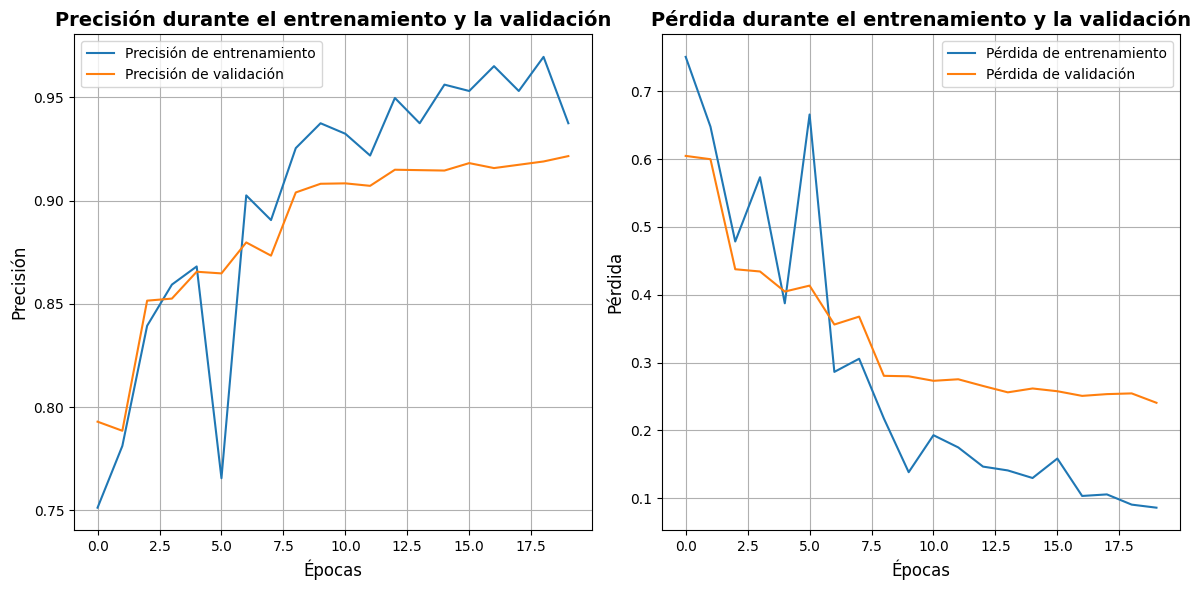

In [30]:
# Graficar la precisión (accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True)

# Graficar la pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True)

# Ajustar diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

**RESULTADOS DEL ENTRENAMIENTO DEL MODELO MLP:**

* **Análisis del gráfico de Precisión:**

  * **Curva de Precisión de Entrenamiento:** La precisión del modelo ResNet50 en el conjunto de entrenamiento muestra un comportamiento oscilante, alcanzando un valor cercano al 95% hacia las últimas épocas. Esta variabilidad puede deberse a los ajustes realizados durante el entrenamiento, pero el resultado final indica que el modelo ha aprendido bien los patrones del conjunto de datos de entrenamiento.

  * **Curva de Precisión de Validación:** La precisión en el conjunto de validación también mejora progresivamente a lo largo de las épocas, llegando a estabilizarse alrededor del 90%. Este comportamiento sugiere que el modelo generaliza bien, aunque no alcanza la misma precisión observada en el conjunto de entrenamiento, lo que indica que el modelo podría estar cerca de su límite en términos de capacidad de generalización.

* **Análisis del gráfico de Pérdida:**

  * **Curva de Pérdida de Entrenamiento:** La pérdida en el conjunto de entrenamiento desciende de manera continua, lo que es una señal positiva de que el modelo está optimizando sus parámetros y reduciendo el error a medida que avanza el entrenamiento. El valor final de la pérdida se estabiliza en torno a 0.2, lo que es un indicativo de un buen ajuste en el conjunto de entrenamiento.

  * **Curva de Pérdida de Validación:** La pérdida en el conjunto de validación sigue una tendencia similar, pero ligeramente más elevada que en el conjunto de entrenamiento, estabilizándose alrededor de 0.4. Esta diferencia sugiere que, aunque el modelo es eficiente en la predicción de los datos de prueba, aún presenta un margen de mejora en términos de generalización a datos no vistos.

**INTERPRETACIÓN:**

* **Discrepancia entre Entrenamiento y Validación:** Aunque ambas curvas de precisión y pérdida siguen una tendencia positiva, se observa una ligera divergencia entre el desempeño en entrenamiento y validación. El hecho de que la precisión en validación sea menor que en entrenamiento y la pérdida en validación más alta podría indicar un leve sobreajuste del modelo. No obstante, la discrepancia no es excesivamente pronunciada, lo que refleja que el modelo tiene un buen rendimiento general.

* **Posible mejora:** Dado que las curvas se estabilizan hacia el final, el modelo podría beneficiarse de ajustes adicionales en la regularización, como técnicas de dropout o un aumento adicional de los datos (data augmentation) para reducir el sobreajuste y mejorar la precisión en el conjunto de validación.

### **4.3.6 Evaluación del Modelo ResNet50 con Matriz de Confusión**
Al igual que en los modelos anteriores, generamos una matriz de confusión para observar el rendimiento del modelo en las diferentes clases de CIFAR-10.

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step


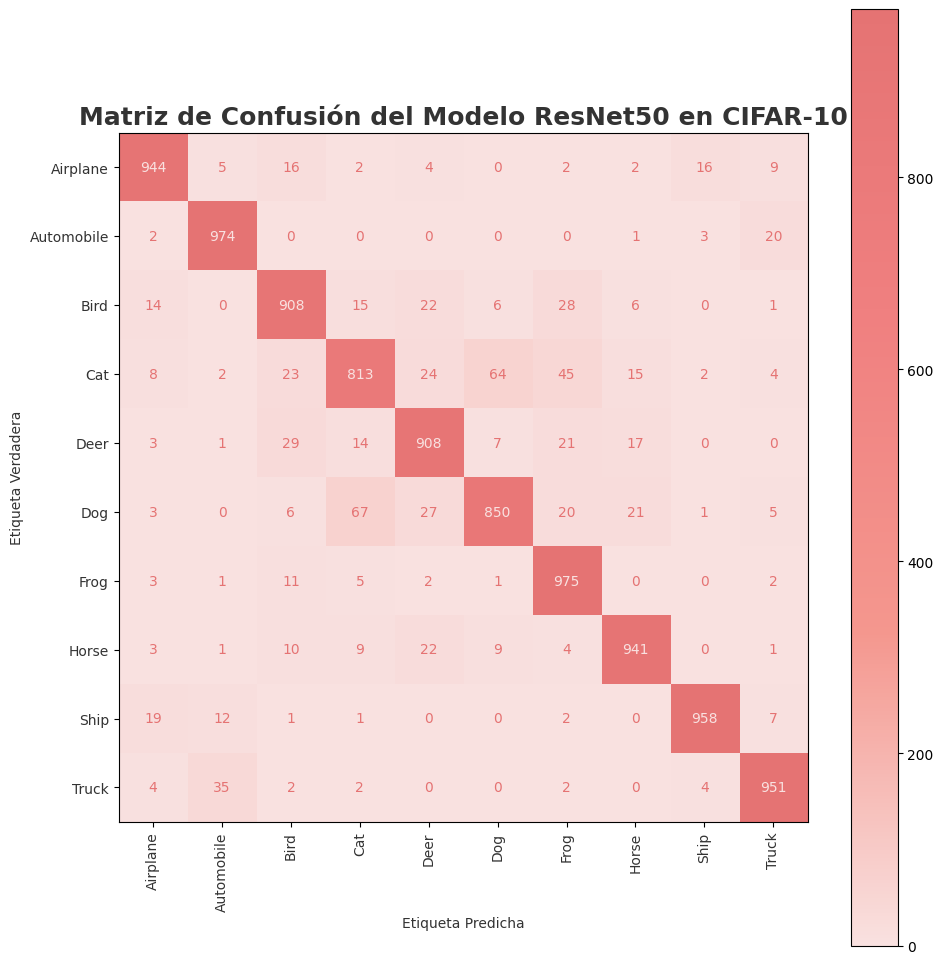

In [31]:
# Realizar predicciones en el conjunto de prueba
y_pred = np.argmax(ResNet_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Crear un gradiente de color en tonos pastel rosas
pastel_pink_cmap = LinearSegmentedColormap.from_list("pastel_pink", ['#f9e1e0', '#f4978e', '#f08080', '#e57373'])

# Mostrar la matriz de confusión con personalización
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Ajustar tamaño de la figura
disp.plot(ax=ax, cmap=pastel_pink_cmap, xticks_rotation='vertical', values_format='d')

# Personalización de la visualización
plt.title("Matriz de Confusión del Modelo ResNet50 en CIFAR-10", fontsize=18, fontweight='bold', color='#333')
plt.xticks(fontsize=10, color='#333')
plt.yticks(fontsize=10, color='#333')
plt.ylabel('Etiqueta Verdadera', fontsize=10, color='#333')
plt.xlabel('Etiqueta Predicha', fontsize=10, color='#333')

# Ajustar los márgenes y mostrar
plt.tight_layout()
plt.show()


**Principales observaciones para el modelo ResNet50:**

* **Aciertos y confusión:** El modelo ResNet50 muestra un rendimiento sobresaliente en la mayoría de las clases, con una alta precisión en "Airplane", "Automobile", "Frog", y "Ship". Sin embargo, se observan algunas confusiones en clases como "Cat", "Bird", y "Dog", lo que indica que el modelo aún tiene dificultades para distinguir imágenes con características similares, particularmente entre clases de animales. En general, el modelo es robusto, pero podría beneficiarse de un refinamiento adicional para mejorar la precisión en estas clases más desafiantes.

### **4.3.7 Conclusiones del Modelo ResNet50**

* **Rendimiento Global:** El modelo ResNet50 ha demostrado un rendimiento sobresaliente en la tarea de clasificación de imágenes del conjunto de datos CIFAR-10, alcanzando una precisión en el conjunto de prueba de aproximadamente 91.36%. Este valor refleja la capacidad del modelo para generalizar bien a datos no vistos, superando ampliamente los resultados obtenidos con arquitecturas más simples como MLP o incluso CNNs estándar.

* **Capacidad de Generalización:** El modelo ha mostrado una excelente capacidad de generalización, como lo evidencian las curvas de precisión y pérdida en el conjunto de validación. Aunque existe una ligera diferencia entre las curvas de entrenamiento y validación (lo que sugiere un pequeño sobreajuste), la discrepancia no es significativa, lo que refleja un equilibrio entre el aprendizaje de patrones y la capacidad del modelo para no memorizar los datos de entrenamiento.

* **Rendimiento por Clase:** El análisis de la matriz de confusión destaca que ResNet50 clasifica con alta precisión clases como "Airplane", "Automobile", "Frog", y "Ship". Sin embargo, el modelo presenta ciertas dificultades en clases como "Bird", "Cat", y "Dog", probablemente debido a la similitud visual entre estas categorías. Esto sugiere que el modelo podría beneficiarse de técnicas adicionales para mejorar su discriminación entre clases visualmente parecidas.

* **Optimización del Entrenamiento:** Durante el entrenamiento, se implementaron callbacks como EarlyStopping y ReduceLROnPlateau para evitar el sobreajuste y ajustar de manera eficiente la tasa de aprendizaje. Estos mecanismos fueron efectivos para estabilizar las métricas y asegurar que el modelo no sobreentrenara, lo que permitió alcanzar una convergencia óptima.

* **Posibles Mejoras:** A pesar de los resultados sobresalientes, el modelo podría beneficiarse de algunas mejoras adicionales:

  * **Aumentación de datos:** Se podría aplicar un conjunto más amplio de técnicas de aumentación de datos para generar más variabilidad en las imágenes de entrenamiento, lo que ayudaría a mejorar la generalización en clases más difíciles.
  * **Regularización:** Aunque se aplicó dropout en las capas densas finales, una mayor regularización podría mitigar el ligero sobreajuste observado, especialmente en las últimas épocas del entrenamiento.

**Conclusión Final:** ResNet50 ha demostrado ser una arquitectura altamente efectiva para la clasificación de imágenes en CIFAR-10, superando en rendimiento a modelos más simples como MLP y CNN. Con una precisión cercana al 92%, este modelo se destaca por su capacidad de capturar características complejas de las imágenes. Sin embargo, algunas clases con características visuales similares aún presentan desafíos, y la aplicación de estrategias adicionales de aumentación y regularización podría mejorar aún más los resultados.

# **5. Comparativo de Resultados para MLP, CNN y ResNet50**

**Precisión:**

* MLP tiene la menor precisión (50.45%) debido a su incapacidad de capturar las relaciones espaciales en las imágenes, lo que es crucial en la clasificación de imágenes.
* CNN mejora notablemente sobre MLP, alcanzando una precisión del 71.28% gracias a su capacidad para captar patrones espaciales. Sin embargo, sigue presentando debilidades en clases de animales con características similares.
* ResNet50 es el modelo con mejor rendimiento, alcanzando un 91.36% de precisión en el conjunto de prueba. Esto se debe a que aprovecha el aprendizaje transferido de una arquitectura robusta como ResNet, preentrenada en ImageNet.

**Pérdida:**

* MLP presenta la mayor pérdida (1.43), lo que indica que el modelo comete errores significativos en las predicciones.
* CNN reduce considerablemente la pérdida (0.97), mostrando que el modelo comete menos errores en la clasificación de imágenes, pero aún tiene margen de mejora.
* ResNet50 es el más eficiente, con una pérdida de 0.27, lo que indica un modelo bien ajustado y con menor error de clasificación.

**Fortalezas:**

* MLP tiene la ventaja de ser más sencillo de implementar y entrenar, pero su incapacidad de captar relaciones espaciales lo limita severamente.
* CNN mejora considerablemente en imágenes donde la estructura espacial es clave, siendo más eficiente en clases con características más distintivas como "Airplane" y "Ship".
* ResNet50 sobresale en su capacidad para generalizar debido a los pesos preentrenados de ImageNet y su arquitectura residual, lo que le permite captar características complejas de manera más eficiente.

**Debilidades:**

* MLP es inadecuado para la clasificación de imágenes complejas debido a su incapacidad para capturar relaciones espaciales, presentando confusiones significativas en clases de animales.
* CNN aunque mejora sobre MLP, sigue mostrando confusión entre clases de animales con características visuales similares.
* ResNet50 tiene dificultades en clases de animales como "Bird", "Cat", y "Dog", lo que sugiere que, aunque es robusto, aún puede beneficiarse de refinamientos adicionales.

**Posibles Mejoras:**

* MLP se beneficiaría de un cambio completo de arquitectura hacia CNN o ResNet, además de técnicas de regularización y aumentación de datos para mejorar la capacidad de generalización.
* CNN podría mejorar aún más con regularización adicional para reducir el sobreajuste y más aumentación de datos para abordar la confusión en clases similares.
* ResNet50 ya muestra un rendimiento sobresaliente, pero podría beneficiarse de técnicas adicionales de regularización y mayor afinación en las capas superiores para mejorar la clasificación en clases más desafiantes.


# **6. Conclusiones**

Mejora significativa del rendimiento con arquitecturas avanzadas: Los modelos más complejos, como ResNet50, superaron claramente a los modelos más simples como el MLP y la CNN en la tarea de clasificación de imágenes en el dataset CIFAR-10.

Precisión: ResNet50 alcanzó la mejor precisión general (alrededor del 91%), mostrando su capacidad para aprender características complejas y generales del dataset. CNN también mostró una mejora significativa sobre el MLP, pero no fue tan robusta como ResNet50.

Confusión entre clases de animales: Tanto el MLP como la CNN mostraron dificultades en distinguir correctamente entre clases de animales similares (por ejemplo, "Dog", "Cat" y "Bird"). Aunque ResNet50 mejoró esta situación, aún persisten algunas confusiones en estas clases.

Generalización: ResNet50 mostró una gran capacidad de generalización debido a su uso de aprendizaje transferido de ImageNet, lo que permitió un mejor reconocimiento de patrones complejos.

Oportunidades de mejora: A pesar del rendimiento sobresaliente de ResNet50, el uso de técnicas adicionales de aumentación de datos y regularización podría mejorar aún más el rendimiento en clases difíciles como los animales, y reducir aún más los errores de clasificación.

# **7. Referencias Bibliográficas**

**1. **Krizhevsky**, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. Advances in neural information processing systems, 25.**

Este artículo seminal presenta el uso de redes convolucionales (CNN) en la clasificación de imágenes y sienta las bases para muchas arquitecturas posteriores, como ResNet.

**2. He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).**

Este trabajo presenta la arquitectura ResNet, que utiliza conexiones residuales y ha demostrado resultados de vanguardia en múltiples tareas de clasificación de imágenes.

**3. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.**

Este libro ofrece una base sólida sobre los conceptos de aprendizaje profundo, incluidos los MLP, CNN, y otros enfoques relevantes para la clasificación de imágenes.

**4. Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2009). ImageNet: A large-scale hierarchical image database. In 2009 IEEE conference on computer vision and pattern recognition (pp. 248-255). Ieee.**

ImageNet es la base de datos utilizada para entrenar modelos avanzados como ResNet. Este artículo describe la creación de este dataset y su impacto en la investigación de visión por computadora.

**5. Simonyan, K., & Zisserman, A. (2015). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.**

Este artículo introduce la arquitectura VGG, otro de los modelos profundos importantes en la clasificación de imágenes, que puede ser comparado con las arquitecturas mencionadas en tu trabajo.

**6. Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.**

Un libro clásico que ofrece un marco teórico para el aprendizaje automático y la clasificación de patrones, útil para comprender los fundamentos detrás de los modelos MLP y CNN.

**7. Krizhevsky, A. (2009). Learning multiple layers of features from tiny images. Technical report, University of Toronto.**

Este informe describe el dataset CIFAR-10 utilizado en tus experimentos, uno de los conjuntos de datos más importantes en la investigación de clasificación de imágenes.